# Traffic Data Analysis and Visualization using Jupyter, Python and Pandas

In [1]:
import pandas
import math
import matplotlib

In [2]:
laned_data = pandas.read_csv('5270Sapp.csv', parse_dates=['Time_AEST'])

In [3]:
def harmonic_mean_speed(group) :
    hms_dataframe = group
    hms_dataframe['vol_over_speed'] = hms_dataframe['Volume']/hms_dataframe['Speed']
    hms_dataframe = hms_dataframe.dropna(subset=['Speed']) 

    try:
        hms = sum(hms_dataframe['Volume'])/sum(hms_dataframe['vol_over_speed'])
    except:
        hms = float('NaN')
        
    return hms

# Determine volume weighted harmonic mean speed for each lane (detector)


In [4]:
laned_data.groupby('Detector_ID').apply(harmonic_mean_speed)

Detector_ID
5270-VD01    55.775448
5270-VD03    74.248360
5270-VD05    85.463014
5270-VD07    85.805461
dtype: float64

# Combine lanes into one row for each time point

In [5]:
def combine_lanes(group) :
    return pandas.Series([group.Volume.mean(), group.Occupancy.mean(), harmonic_mean_speed(group)], index=['Volume', 'Occupancy', 'Speed'])

combined_lanes = laned_data.groupby('Time_AEST').apply(combine_lanes)
combined_lanes

,Volume,Occupancy,Speed
Time_AEST,,,
2021-05-01 00:00:00,3.00,1.250,93.166874
2021-05-01 00:01:00,4.50,1.850,94.288727
2021-05-01 00:02:00,4.75,2.425,95.600662
2021-05-01 00:03:00,3.50,1.750,97.728598
2021-05-01 00:04:00,1.50,0.750,98.831092
...,...,...,...
2021-06-30 23:55:00,2.25,1.150,97.442865
2021-06-30 23:56:00,1.50,0.550,95.458775
2021-06-30 23:57:00,1.50,0.725,100.468514


# Analyse 2nd Week (2021-05-10 to 2021-05-16)

In [6]:
import datetime
import calendar

start = datetime.date(2021, 5, 10)
end = datetime.date(2021, 5, 17)

<AxesSubplot:title={'center':'Combined Volume vs Date time (for week 2)'}, xlabel='Date time (AEST)', ylabel='Volume (vehicles/min)'>

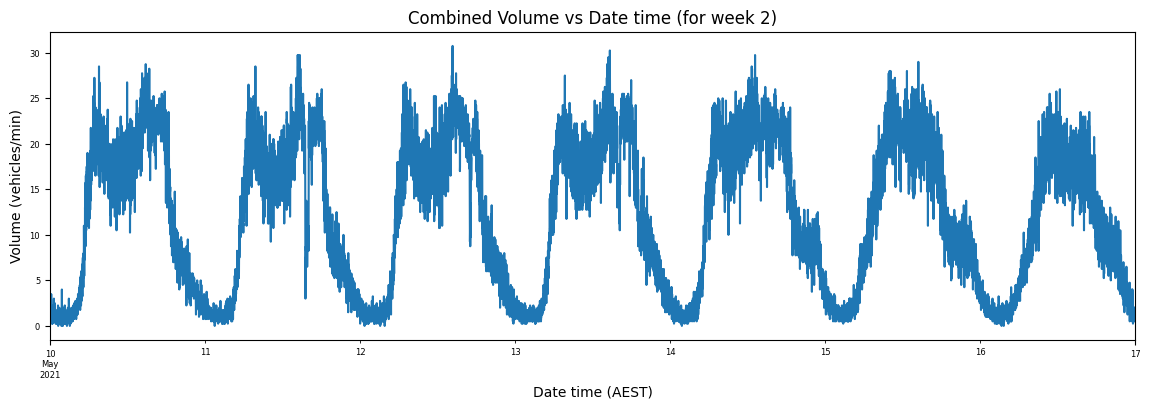

In [7]:
combined_lanes[start:end].plot.line(figsize = (14, 4), y = 'Volume', legend=False, title = 'Combined Volume vs Date time (for week 2)',
xlabel = 'Date time (AEST)', ylabel = ('Volume (vehicles/min)'), fontsize = 6)

<b>^ Above plot indicates the Volume (vehicles/min) spikes each day and dips each night, the spikes on the 15th and 16th May are the lowest (this makes sense at 15th - 16th May was a weekend where highway traffic is generally lower). </b>

<AxesSubplot:title={'center':'Combined Occupancy vs Date time (for week 2)'}, xlabel='Date time (AEST)', ylabel='Occupancy %'>

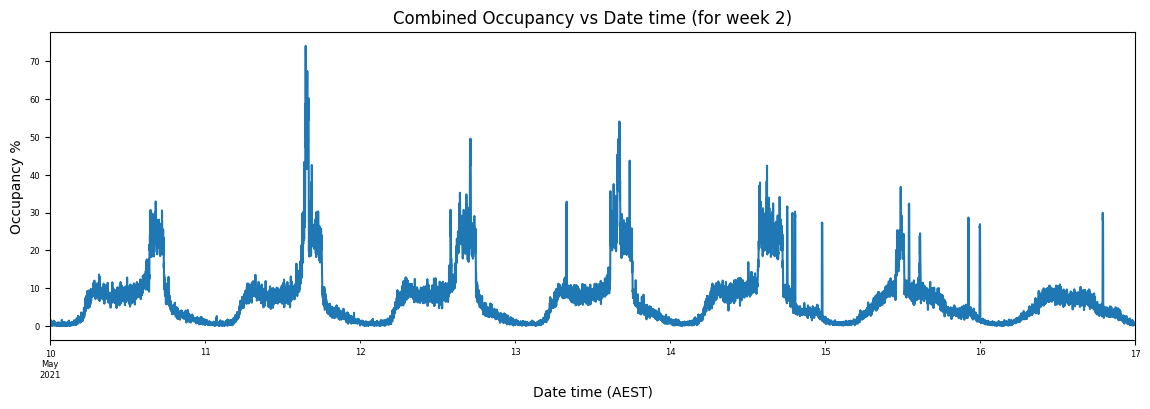

In [8]:
combined_lanes[start:end].plot.line(figsize = (14, 4), y = 'Occupancy', legend=False, title = 'Combined Occupancy vs Date time (for week 2)',
xlabel = 'Date time (AEST)', ylabel = 'Occupancy %', fontsize = 6)

<b>^ Above plot indicates that road occupancy reached critical amounts (>70%) on the 12th May and reaching quite high % levels on other weekdays, this may have resulted from large volumes of peak hour traffic and/or cars going very slowly over the sensors. </b>

<AxesSubplot:title={'center':'Combined Speed vs Date time (for week 2)'}, xlabel='Date time (AEST)', ylabel='Speed (km/h)'>

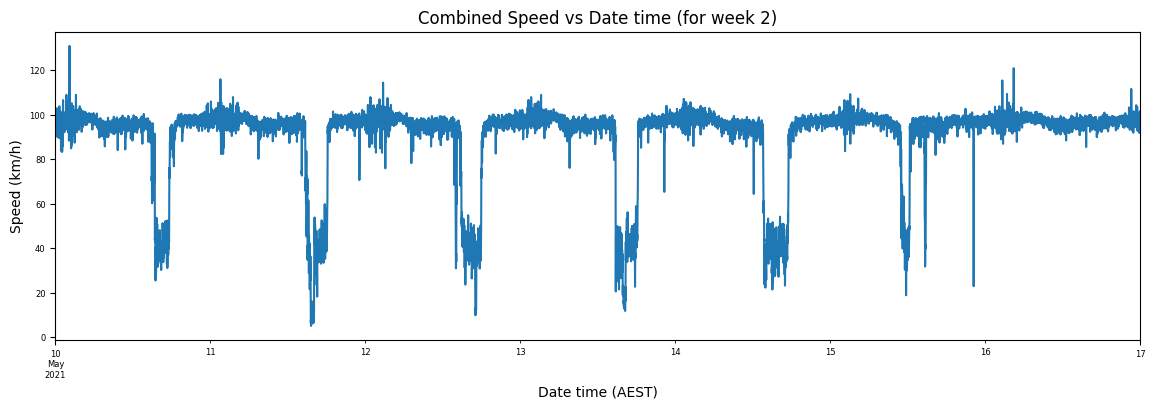

In [9]:
combined_lanes[start:end].plot.line(figsize = (14, 4), y = 'Speed', legend=False, title = 'Combined Speed vs Date time (for week 2)',
xlabel = 'Date time (AEST)', ylabel = 'Speed (km/h)', fontsize = 6)

<b>^ Above plot indicates that speed during non-peak hours (as seen in previous plots) is generally around 100km/h, however during peak hours the WHM speed drops significantly each day, nearing 0 km/h on the 11th May perhaps indicating a crash or perhaps just due to the very high occupancy indicated during this period leading to near stand-still traffic. The speed does not have a significant dip on the weekend as traffic seems to flow more freely. </b>

# Analyse by Day of week

In [10]:
combined_lanes_2 = combined_lanes.reset_index(['Time_AEST'])


In [11]:
combined_lanes_2['day_of_week'] = combined_lanes_2['Time_AEST'].dt.day_name()

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorter_index = dict(zip(sorter, range(len(sorter))))

combined_lanes_2['Day_id'] = combined_lanes_2.index
combined_lanes_2['Day_id'] = combined_lanes_2['day_of_week'].map(sorter_index)


Volume    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

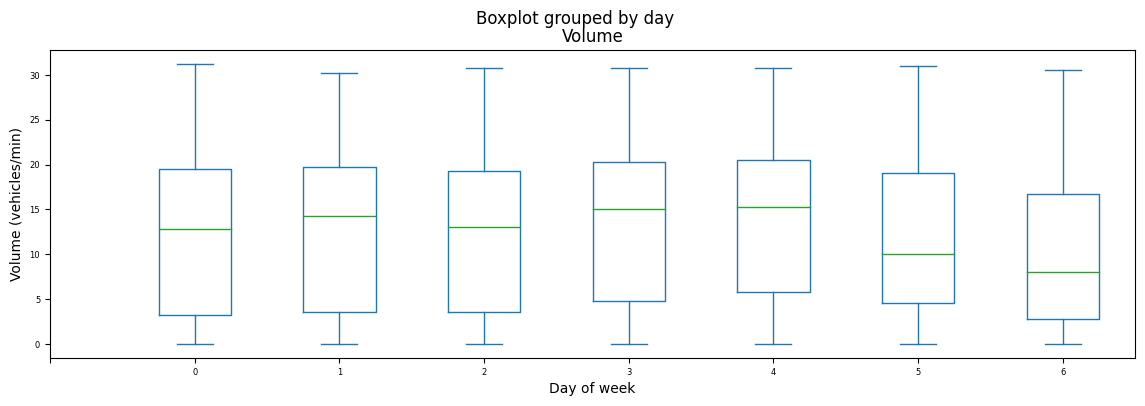

In [12]:
boxplot_volume_by_day = combined_lanes_2.plot.box(showfliers = True, column='Volume', by='Day_id', figsize=(14,4), xticks=(range(0,8)), title = 'Boxplot grouped by day',
xlabel = 'Day of week', ylabel = 'Volume (vehicles/min)', fontsize = 6)

boxplot_volume_by_day


<b>^ Maximum and minimum traffic volumes seem to be relatively uniform across all days of the week (approx. 0-32 vehicles/min), however the upper quartile and mean are all increased during weekdays with Fridays having the highest quartiles across the board indicating that general volume is at it's highest on Fridays (perhaps due to the combination of work and holiday commuters using the highway leading into the weekend). </b>

Speed    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

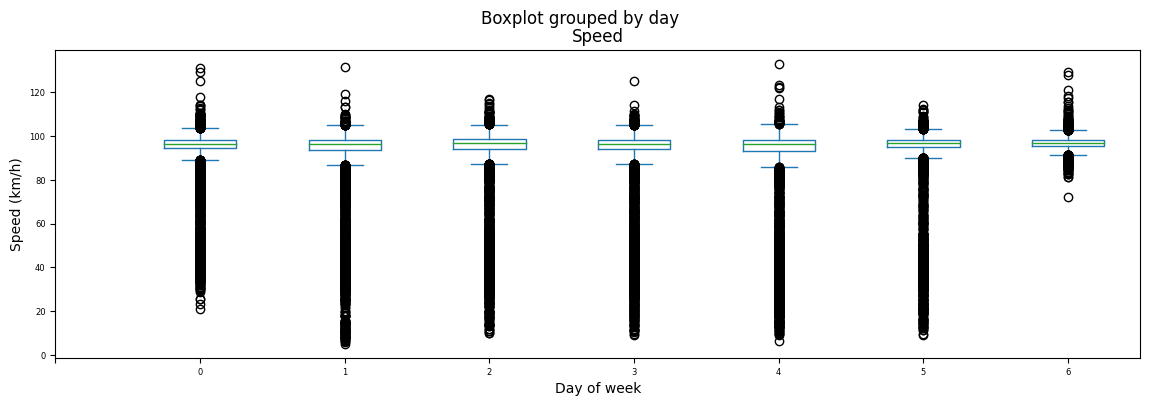

In [13]:
boxplot_speed_by_day = combined_lanes_2.plot.box(showfliers = True, column='Speed', by='Day_id', figsize=(14,4), xticks=(range(0,8)), title = 'Boxplot grouped by day',
xlabel = 'Day of week', ylabel = 'Speed (km/h)', fontsize = 6)

boxplot_speed_by_day


<b>^ If we set the showfliers function to false we see that the boxplot returns a relatively smooth quantile boxplot for each day ranging from ~85-105km/h, however when outliers are shown  we can see that the speed outliers are quite extreme (particularly to the downside), indicating that near-stand-still traffic takes place (likely during peak hour) regularly on all days except Sunday with the upper and lower quartiles generally sitting near 100km/h. All weekdays and Saturdays seem to be worst affected (interestingly Satrudays seem to show lower outlier and mean speed than Mondays). It can be noted that there are many more outliers to the downside than the upside and while there are definitely cars speeding they are far more likely to be going below the speed limit. </b>

Occupancy    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

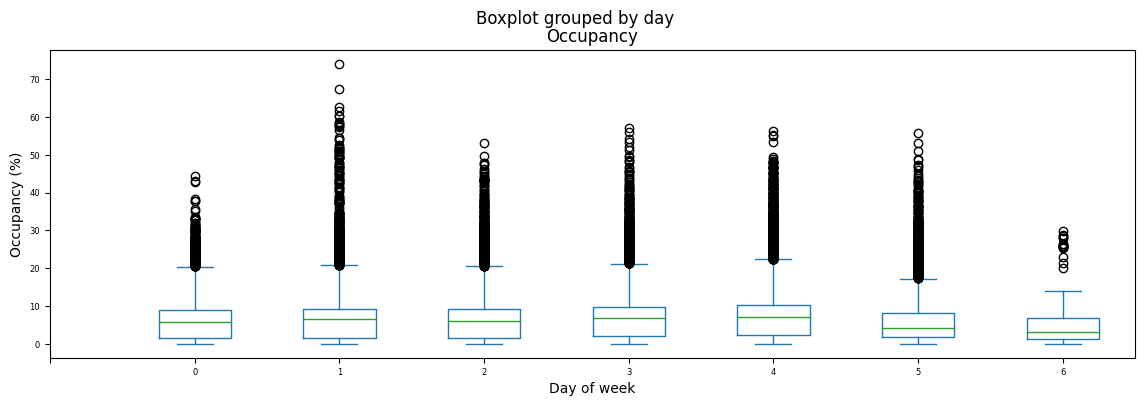

In [14]:
boxplot_occupancy_by_day = combined_lanes_2.plot.box(showfliers = True, column='Occupancy', by='Day_id', figsize=(14,4), xticks=(range(0,8)), title = 'Boxplot grouped by day',
xlabel = 'Day of week', ylabel = 'Occupancy (%)', fontsize = 6)

boxplot_occupancy_by_day

<b>^ Significant outliers (likely during peak hour) show that occupancy reaches near-critical levels most week-days however the majority of occupancy rates are within the ~0-20% range. Tuesday seem to show the most concerningly high occupany rates. It is important to note that this road data was collected during intermittent Covid Lockdowns between 2020-2021 which indicates that an increase in occupancy rates may be noticed in data taken from other years due to increased pre/post-lockdown commuting. It is important to display outlier data in this boxplot as removing it illustrates a (perhaps deceiving) dataset of low occupancy for all days (approx. 0-22%) </b>

# Analyse by Hour of day

In [15]:
#

laned_data_wrk = laned_data.copy()

laned_data_wrk['day_of_week'] = laned_data_wrk['Time_AEST'].dt.day_name()

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorter_index = dict(zip(sorter, range(len(sorter))))

laned_data_wrk['Day_id'] = laned_data_wrk.index
laned_data_wrk['Day_id'] = laned_data_wrk['day_of_week'].map(sorter_index)


In [16]:
laned_data_wrk['hour_of_day'] = laned_data_wrk['Time_AEST'].dt.hour

laned_data_wrk


,Time_AEST,Detector_ID,Volume,Occupancy,Speed,day_of_week,Day_id,hour_of_day
0,2021-05-01 00:00:00,5270-VD01,1,0.4,79.0,Saturday,5,0
1,2021-05-01 00:01:00,5270-VD01,0,0.0,NaN,Saturday,5,0
2,2021-05-01 00:02:00,5270-VD01,0,0.0,NaN,Saturday,5,0
3,2021-05-01 00:03:00,5270-VD01,1,0.3,100.0,Saturday,5,0
4,2021-05-01 00:04:00,5270-VD01,0,0.1,NaN,Saturday,5,0
...,...,...,...,...,...,...,...,...
351015,2021-06-30 23:55:00,5270-VD07,0,0.0,NaN,Wednesday,2,23
351016,2021-06-30 23:56:00,5270-VD07,1,0.4,100.0,Wednesday,2,23
351017,2021-06-30 23:57:00,5270-VD07,0,0.0,NaN,Wednesday,2,23
351018,2021-06-30 23:58:00,5270-VD07,0,0.0,NaN,Wednesday,2,23


In [17]:
df_days = laned_data_wrk.groupby(['Day_id','day_of_week','hour_of_day'], as_index=False).mean().drop(['Occupancy','Speed','Day_id'], axis=1)

df_combined = laned_data_wrk.groupby(['hour_of_day'], as_index=False).mean().drop(['Occupancy','Speed','Day_id'], axis=1)

df_combined['day_of_week'] = 'Combined'

df_concat = pandas.concat([df_days,df_combined], ignore_index=True)

lineplot_volume_vs_hour = df_concat.pivot(index='hour_of_day', columns='day_of_week', values='Volume')


<ipython-input-17-51c6165ff893>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_days = laned_data_wrk.groupby(['Day_id','day_of_week','hour_of_day'], as_index=False).mean().drop(['Occupancy','Speed','Day_id'], axis=1)
<ipython-input-17-51c6165ff893>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_combined = laned_data_wrk.groupby(['hour_of_day'], as_index=False).mean().drop(['Occupancy','Speed','Day_id'], axis=1)


<AxesSubplot:title={'center':'Volume vs hour of day'}, xlabel='Hour of day', ylabel='Volume (Vehicles/min)'>

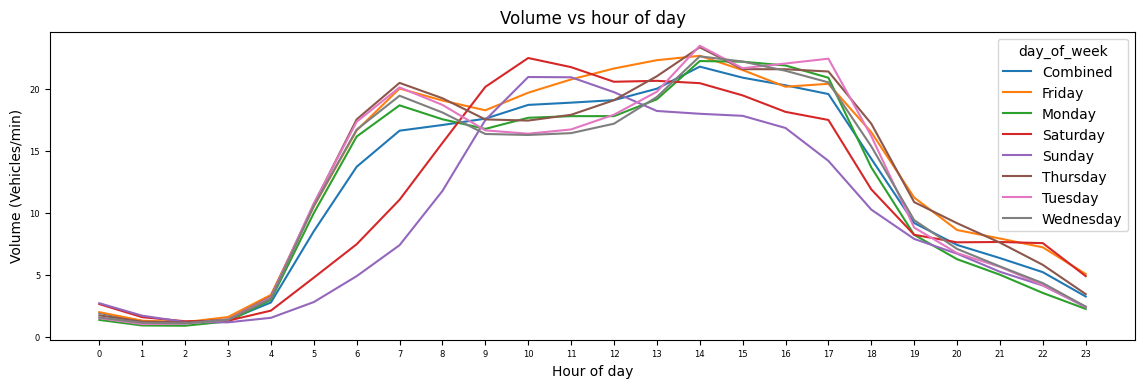

In [18]:
lineplot_volume_vs_hour.plot.line(xlabel = 'Hour of day', ylabel = 'Volume (Vehicles/min)', title = 'Volume vs hour of day'
                  , figsize=(14,4), fontsize = 6, xticks = range(0,24))

<b>^ This line plot shows (as we hypothesised earlier) that traffic volume does indeed pick up during daylight hours (beginning from about 5am, peaking just after 2pm and slowly decreasing until it evens out at around 7pm). An interesting anomaly are the Saturdays & Sundays displaying peaks in the mid-morning and gradually dissipating for the remainder of the day. </b>

In [19]:
df_days = laned_data_wrk.groupby(['Day_id','day_of_week','hour_of_day'], as_index=False).mean().drop(['Volume','Speed','Day_id'], axis=1)

df_combined = laned_data_wrk.groupby(['hour_of_day'], as_index=False).mean().drop(['Volume','Speed','Day_id'], axis=1)

df_combined['day_of_week'] = 'Combined'

df_concat = pandas.concat([df_days,df_combined], ignore_index=True)

lineplot_occupancy_vs_hour = df_concat.pivot(index='hour_of_day', columns='day_of_week', values='Occupancy')

<ipython-input-19-a2920e0ed1fd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_days = laned_data_wrk.groupby(['Day_id','day_of_week','hour_of_day'], as_index=False).mean().drop(['Volume','Speed','Day_id'], axis=1)
<ipython-input-19-a2920e0ed1fd>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_combined = laned_data_wrk.groupby(['hour_of_day'], as_index=False).mean().drop(['Volume','Speed','Day_id'], axis=1)


<AxesSubplot:title={'center':'Occupancy vs hour of day'}, xlabel='Hour of day', ylabel='Occupancy %'>

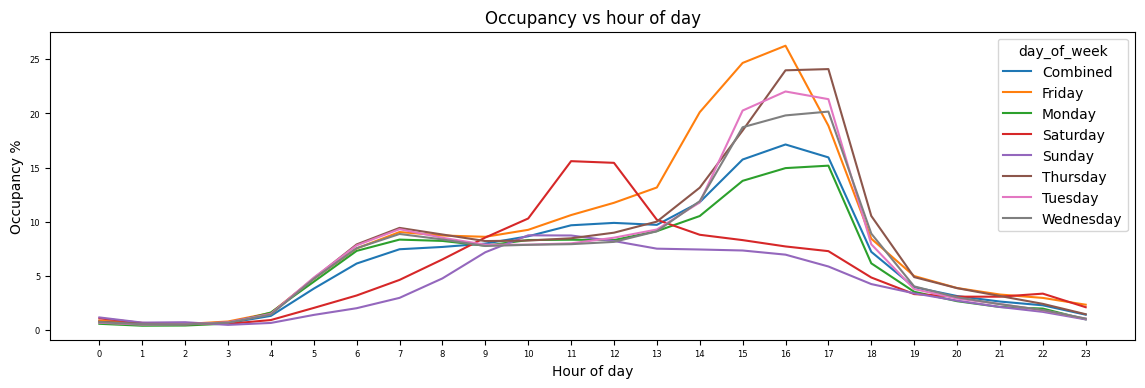

In [20]:
lineplot_occupancy_vs_hour.plot.line(xlabel = 'Hour of day', ylabel = 'Occupancy %', title = 'Occupancy vs hour of day'
                  , figsize= (14,4), fontsize = 6, xticks = range(0,24))

<b>^ High Occupancy, as expected is on all weekdays, however it is interesting to note that the peak occupancy levels are quite a bit more elevated in the afternoon peak hours with only Saturdays & Sundays having their peak traffic prior to midday. In general it would seems that the morning peak hour commute is generally a faster one according to this plot. </b>

In [21]:
df_days = laned_data_wrk.groupby(['Day_id','day_of_week','hour_of_day'], as_index=False).apply(lambda x: pandas.Series({'Speed':harmonic_mean_speed(x)}))

df_combined = laned_data_wrk.groupby(['hour_of_day'], as_index=False).apply(lambda x: pandas.Series({'Speed':harmonic_mean_speed(x)}))

df_combined['day_of_week'] = 'Combined'

df_concat = pandas.concat([df_days,df_combined], ignore_index=True)

lineplot_speed_vs_hour = df_concat.pivot(index='hour_of_day', columns='day_of_week', values='Speed')

<AxesSubplot:title={'center':'Speed vs hour of day'}, xlabel='Hour of day', ylabel='Speed (Km/h)'>

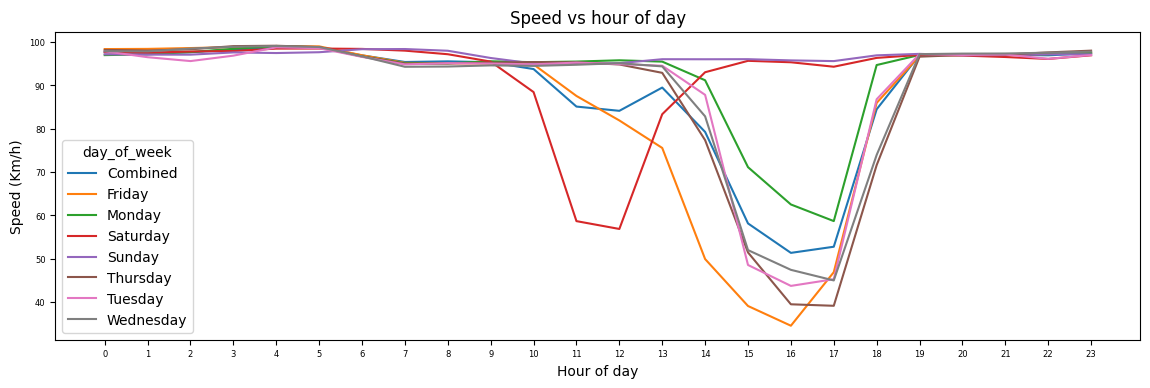

In [22]:
lineplot_speed_vs_hour.plot.line(xlabel = 'Hour of day', ylabel = 'Speed (Km/h)', title = 'Speed vs hour of day'
                  , figsize= (14,4), fontsize = 6, xticks = range(0,24))

<b>^ This plot seems to be quite close to a direct inverse correlation of the above Occupancy plot. Friday afternoons are the worst offenders for low speeds, this is unsurprising as anyone who has used this highway to travel to the coast from Brisbane on a Friday afternoon knows that it can take alot longer than normal. The lack of drop in speeds during all mornings is surprising given the road volume seen at these times. Perhaps people just drive slower en route home from work or the road reaches a 'critical speed' point where a certain amount of commuters will cause traffic to gridlock.  </b>

# Analyse relationship between variables

<AxesSubplot:title={'center':'Combined Volume vs Speed (Scatter Plot)'}, xlabel='Speed (km/h)', ylabel='Volume (Vehicles/min)'>

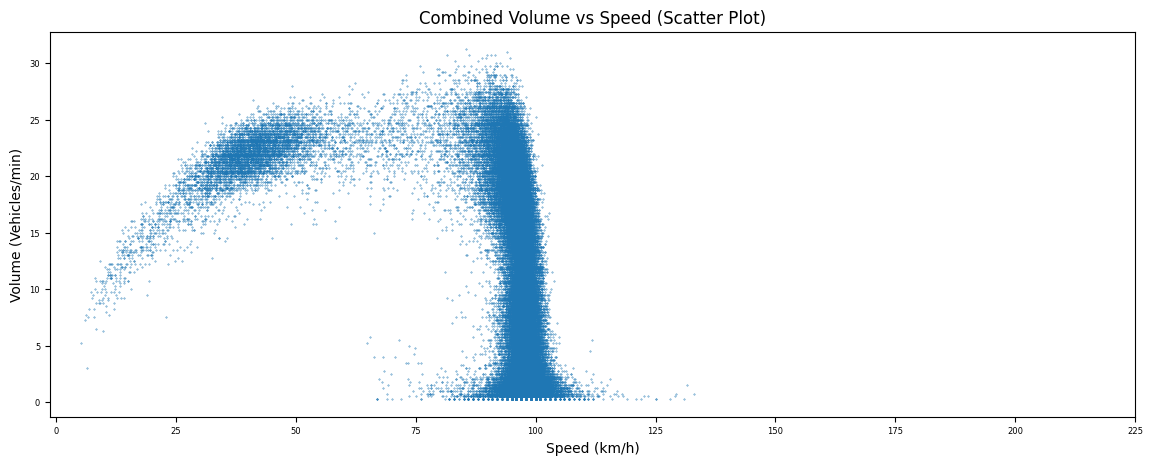

In [23]:
combined_lanes.plot.scatter(subplots = False, figsize=(14,5), s=0.1, x='Speed', y='Volume', xticks=(range(0,250,25)), fontsize = 6
                            , xlabel = 'Speed (km/h)', ylabel = 'Volume (Vehicles/min)', title = 'Combined Volume vs Speed (Scatter Plot)')


<b>^ This scatter plot indicates that a general trend of speed being around the 100km/h mark are experienced at most volume levels (between ~0-28 vehicles/min). However what is interesting about this plot is that there is a large gap in volume experienced at speeds of between approx. 60-85km/h. The car volume then begins to increase again around the 30-50km/h range indicating that when large volumes of traffic begin to slow, it happens quite rapidly down to the 30-50km/h range with little volume observed at the 60-85km/h 'mid'-range. Large outliers showing very high and very low speeds at low volume are concerning but somewhat rare. </b>

In [24]:
ld2 = laned_data.copy()

ld2['speed_bins'] = pandas.cut(ld2.Speed,range(0,200,10))

ld2_lanes = ld2.groupby(['Detector_ID','speed_bins'],as_index=False).mean()

ld2_combined = ld2.groupby('speed_bins',as_index=False).mean()

ld2_combined['Detector_ID'] = 'Combined'


<ipython-input-24-43f3e0d93150>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ld2_lanes = ld2.groupby(['Detector_ID','speed_bins'],as_index=False).mean()
<ipython-input-24-43f3e0d93150>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ld2_combined = ld2.groupby('speed_bins',as_index=False).mean()


In [25]:
df_concat2 = pandas.concat([ld2_lanes, ld2_combined], ignore_index=True)

lineplot_volume_vs_speed = df_concat2.pivot(index='speed_bins', columns='Detector_ID', values='Volume')


In [36]:
speed_xticks = #manually write out ticks 

lineplot_volume_vs_speed.plot.line(xlabel = 'Speed (Km/h)', ylabel = 'Volume (Vehicles/min)', title = 'Volume vs Speed',
                                   figsize= (14,5), fontsize = 6, xticks = speed_xticks)

<class 'SyntaxError'>: invalid syntax (<ipython-input-36-100eb35817b1>, line 1)

<b>^ This chart interestingly shows that the VD01 Detector generally experiences quite a bit lower volumes and speeds than the other lanes, with very little volume at the 100km/h region (this coroborates with the WHM speed of VD01 being by far the lowest). The other 3 detectors VD03/05/07 experience much greater volumes generally and in particular closer to the 100km/h speed. The would indicate that VD01 is likely the 'slow' left-hand lane and VD07 is the 'fast' lane. </b>

In [27]:
ld3 = laned_data.copy()

ld3['occupancy_bins'] = pandas.cut(ld3.Occupancy,range(0,100,5))

ld3_lanes = ld3.groupby(['Detector_ID','occupancy_bins'],as_index=False).mean()

ld3_combined = ld3.groupby('occupancy_bins',as_index=False).mean()

ld3_combined['Detector_ID'] = 'Combined'


<ipython-input-27-c1d0540c88d0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ld3_lanes = ld3.groupby(['Detector_ID','occupancy_bins'],as_index=False).mean()
<ipython-input-27-c1d0540c88d0>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ld3_combined = ld3.groupby('occupancy_bins',as_index=False).mean()


In [28]:
df_concat3 = pandas.concat([ld3_lanes, ld3_combined], ignore_index=True)

lineplot_volume_vs_occupancy = df_concat3.pivot(index='occupancy_bins', columns='Detector_ID', values='Volume')


<AxesSubplot:title={'center':'Volume vs Occupancy'}, xlabel='Occupancy (%)', ylabel='Volume (Vehicles/min)'>

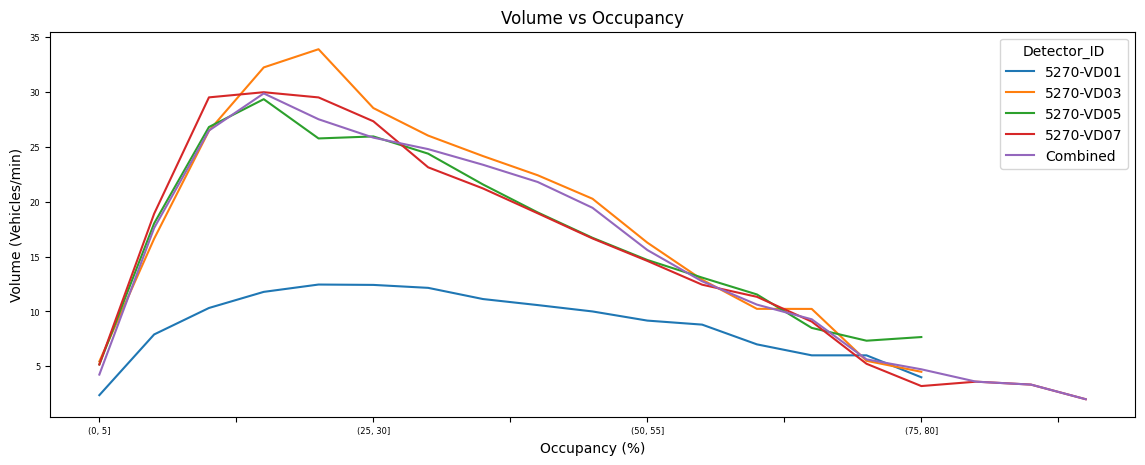

In [29]:
lineplot_volume_vs_occupancy.plot.line(xlabel = 'Occupancy (%)', ylabel = 'Volume (Vehicles/min)', title = 'Volume vs Occupancy'
                  , figsize= (14,5), fontsize = 6)


<b>^ text </b>

In [30]:

ld3_lanes = ld3.groupby(['Detector_ID','occupancy_bins'],as_index=False).apply(lambda x: pandas.Series({'Speed':harmonic_mean_speed(x)}))

ld3_combined = ld3.groupby('occupancy_bins',as_index=False).apply(lambda x: pandas.Series({'Speed':harmonic_mean_speed(x)}))

ld3_combined['Detector_ID'] = 'Combined'


In [31]:
df_concat3 = pandas.concat([ld3_lanes, ld3_combined], ignore_index=True)

lineplot_speed_vs_occupancy = df_concat3.pivot(index='occupancy_bins', columns='Detector_ID', values='Speed')
#drop NANs to clean data
lineplot_speed_vs_occupancy = lineplot_speed_vs_occupancy.dropna()

<AxesSubplot:title={'center':'Speed vs Occupancy'}, xlabel='Occupancy (%)', ylabel='Speed (km/h)'>

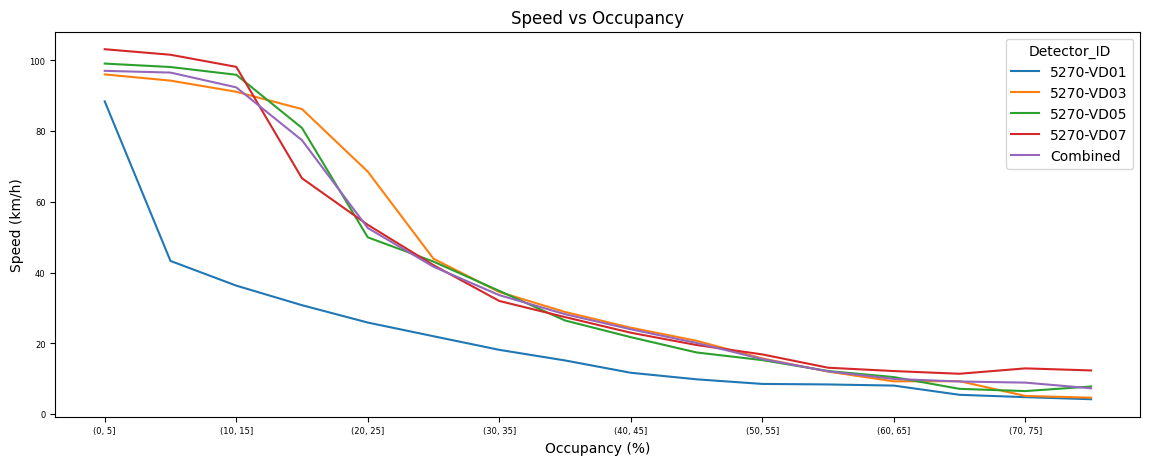

In [32]:
lineplot_speed_vs_occupancy.plot.line(xlabel = 'Occupancy (%)', ylabel = 'Speed (km/h)', title = 'Speed vs Occupancy'
                  , figsize= (14,5), fontsize = 6)


In [33]:
lineplot_speed_vs_occupancy

Detector_ID,5270-VD01,5270-VD03,5270-VD05,5270-VD07,Combined
occupancy_bins,,,,,
"(0, 5]",88.419307,96.039460,99.102804,103.159431,97.050131
"(5, 10]",43.328760,94.288878,98.129250,101.597448,96.559378
"(10, 15]",36.353098,91.134947,95.938799,98.178742,92.382423
"(15, 20]",30.820730,86.244692,80.915712,66.686762,77.436214
"(20, 25]",25.919536,68.570681,50.008855,53.537361,52.644372
"(25, 30]",22.047874,43.949546,43.137340,42.130647,41.695598
"(30, 35]",18.203527,34.546508,34.865558,32.015071,33.664666
"(35, 40]",15.207419,28.906964,26.504516,27.459987,28.279980
"(40, 45]",11.727377,24.463474,21.786758,23.046109,24.019040


<b>^ text </b>